In [1]:
from META_TOOLBOX import *
#!pip install xlsxwriter

In [2]:
def KNAPSACK(X, INSTANCE):
    """
    Input:
    X
    INSTANCE   |   Instance tag      |      | String
    X          |   Design variables  |      | Integer 
    
    Output
    G                                \ unity weight
    OF
    """
    
    if INSTANCE == 'F1-LOWKP-10D':
        PRICES = [55., 10., 47., 5., 4., 50., 8., 61., 85., 87.]
        COST = [95., 4., 60., 32., 23., 72., 80., 62., 65., 46.]
        W_MAX = 269
        D = 10
    elif INSTANCE == 'F2-LOWKP-20D':
        PRICES = [44., 46., 90., 72., 91., 40., 75., 35., 8., 54., 78., 40., 77., 15., 61., 17., 75., 29., 75., 63.]
        COST = [92., 4., 43., 83., 84., 68., 92., 82., 6., 44., 32., 18., 56., 83., 25., 96., 70., 48., 14., 58.]
        W_MAX = 878
        D = 20
    elif INSTANCE == 'F3-LOWKP-4D':
        PRICES = [9., 11., 13., 15.]
        COST = [6., 5., 9., 7.]
        W_MAX = 20
        D = 4
    elif INSTANCE == 'F4-LOWKP-4D':
        PRICES = [6., 10., 12., 13.]
        COST = [2., 4., 6., 7.]
        W_MAX = 11
        D = 4
    elif INSTANCE == 'F5-LOWKP-15D':
        PRICES = [0.125126, 19.330424, 58.500931, 35.029145, 82.284005, 17.410810, 71.050142, 30.399487, 9.140294, 14.731285, 98.852504, 11.908322, 0.891140, 53.166295, 60.176397]
        COST = [56.358531, 80.874050, 47.987304, 89.596240, 74.660482, 85.894345, 51.353496, 1.498459, 36.445204, 16.589862, 44.569231, 0.466933, 37.788018, 57.118442, 60.716575]
        W_MAX = 375
        D = 15
    elif INSTANCE == 'F6-LOWKP-10D':
        PRICES = [20., 18., 17., 15., 15., 10., 5., 3., 1., 1.]
        COST = [30., 25., 20., 18., 17., 11., 5., 2., 1., 1.]
        W_MAX = 60
        D = 10
    elif INSTANCE == 'F7-LOWKP-7D':
        PRICES = [70., 20., 39., 37., 7., 5., 10.]
        COST = [31., 10., 20., 19., 4., 3., 6.]
        W_MAX = 50
        D = 7
    elif INSTANCE == 'F8-LOWKP-23D':
        PRICES = [981., 980., 979., 978., 977., 976., 487., 974., 970., 485., 485., 970., 970., 484., 484., 976., 974., 482., 962., 961., 959., 958., 857.]
        COST = [983., 982., 981., 980., 979., 978., 488., 976., 972., 486., 486., 972., 972., 485., 485., 969., 966., 483., 964., 963., 961., 958., 959.]
        W_MAX = 10000
        D = 23
    elif INSTANCE == 'F9-LOWKP-5D':
        PRICES = [33., 24., 36., 37., 12.]
        COST = [15., 20., 17., 8., 31.]
        W_MAX = 80
        D = 5
    elif INSTANCE == 'F10-LOWKP-20D':
        PRICES = [91., 72., 90., 46., 55., 8., 35., 75., 61., 15., 77., 40., 63., 75., 29., 75., 17., 78., 40., 44.]
        COST = [84., 83., 43., 4., 44., 6., 82., 92., 25., 83., 56., 18., 58., 14., 48., 70., 96., 32., 68., 92.]
        W_MAX = 879
        D = 20

    OF = 0
    G = 0
    
    for I in range(10):
        OF += X[I] * PRICES[I]
        G += X[I] * COST[I]

    OF *= -1
    G -= W_MAX
    
    return G, OF

In [3]:
# Input
D = 10
X0 = {'X': [0, 1]}
X1 = {'X': [0, 1]}
X2 = {'X': [0, 1]}
X3 = {'X': [0, 1]}
X4 = {'X': [0, 1]}
X5 = {'X': [0, 1]}
X6 = {'X': [0, 1]}
X7 = {'X': [0, 1]}
X8 = {'X': [0, 1]}
X9 = {'X': [0, 1]}
DISCRETE_OPTIONS_DATASET = [X0, X1, X2, X3, X4, X5, X6, X7, X8, X9]

X_L = [0.0] * D
X_U = [1.0] * D
GAMMA = GAMMA_ASSEMBLY(X_L, X_U, D, 2)

PARAMETERS = {
              'ATTRACTIVENESS (BETA_0)': 0.98,
              'MIN. RANDOM FACTOR (ALPHA_MIN)': 0.20,
              'MAX. RANDOM FACTOR (ALPHA_MAX)': 0.95,
              'LIGHT ABSORPTION (GAMMA)': GAMMA,
              'THETA': 0.98,
              'TYPE ALPHA UPDATE': 'YANG 0',
              'SCALING (S_D)': True
             }

SETUP = {
        'N_REP': 10,
        'N_POP': 5,
        'N_ITER': 100,
        'X_L': X_L,
        'X_U': X_U,
        'D': D,
        'NULL_DIC': {'KNAPSACK INFO': 'F1-LOWKP-10D', 'R_P': 10 ** 6, 'DISCRETE SOLUTION TABLE': DISCRETE_OPTIONS_DATASET},
        'PARAMETERS': PARAMETERS
        }

# OF statement
def OF_FUNCTION(X, NULL_DIC):
    
    DATA_DISCRETE = NULL_DIC['DISCRETE SOLUTION TABLE']
    X_NEW = CONVERT_CONTINUOUS_DISCRETE(X, DATA_DISCRETE)
    INSTANCE = NULL_DIC['KNAPSACK INFO']
    R_P = NULL_DIC['R_P']
    G, PROFIT = KNAPSACK(X_NEW, INSTANCE)
    OF = PROFIT + (np.maximum(0, G)) * R_P
    

    return OF

In [4]:
# Call algorithm
RESULTS_REP, BEST_REP, AVERAGE_REP, WORST_REP, STATUS_PROCEDURE = FIREFLY_ALGORITHM_001(OF_FUNCTION, SETUP)

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Process Time: 0.59 Seconds 
 Seconds per repetition: 0.06
META_FA001_REP_0_BEST_0_20230503 164336.xlsx
META_FA001_REP_1_BEST_1_20230503 164336.xlsx
META_FA001_REP_2_BEST_2_20230503 164336.xlsx
META_FA001_REP_3_BEST_3_20230503 164337.xlsx
META_FA001_REP_4_BEST_4_20230503 164337.xlsx
META_FA001_REP_5_BEST_5_20230503 164337.xlsx
META_FA001_REP_6_BEST_6_20230503 164337.xlsx
META_FA001_REP_7_BEST_7_20230503 164337.xlsx
META_FA001_REP_8_BEST_8_20230503 164337.xlsx
META_FA001_REP_9_BEST_9_20230503 164337.xlsx
META_FA001_RESUME_20230503 164337.xlsx


In [5]:
# Melhor resultado para as dimensões desejadas
BESTBEST_FA = STATUS_PROCEDURE[0]
BEST = BEST_REP[BESTBEST_FA]
AVERAGE = AVERAGE_REP[BESTBEST_FA]
WORST = WORST_REP[BESTBEST_FA]
DIMENSOES = list(BEST['X_POSITION'][-1,:])

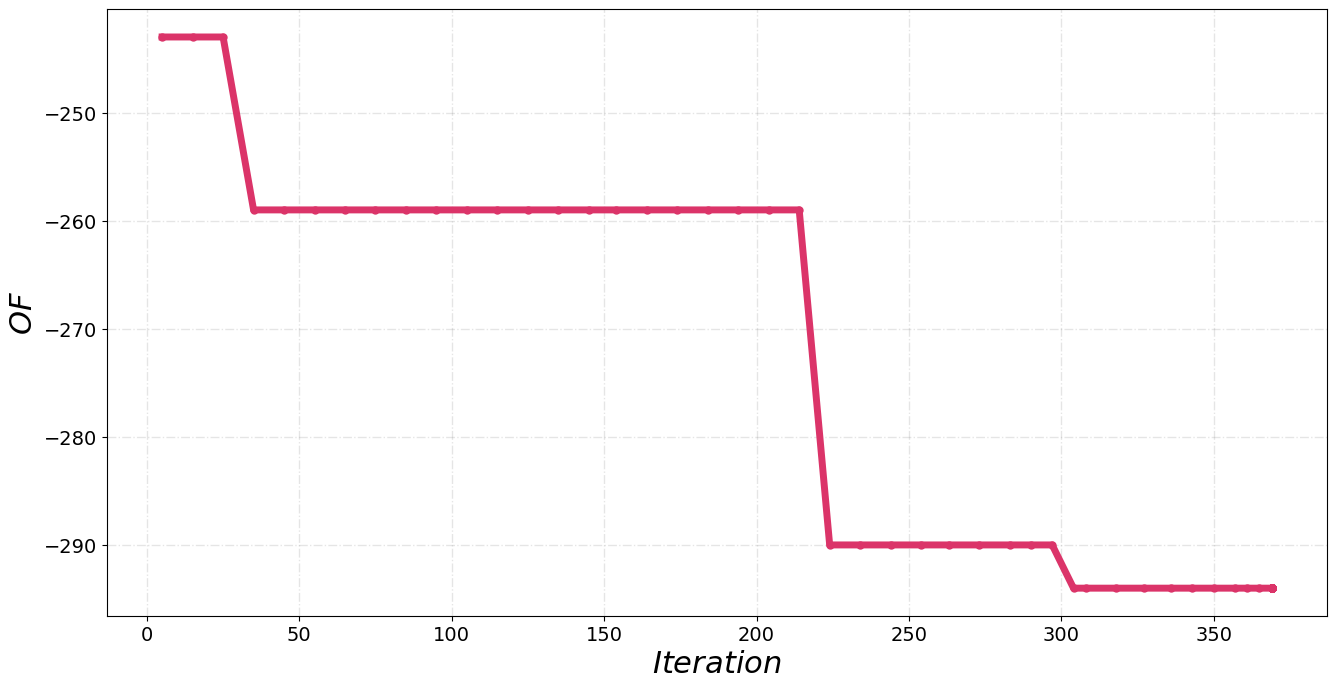

In [6]:
# Chart setup
CHART_SETUP = {   
               'NAME': 'WANDER',
               'WIDTH': 0.40, 
               'HEIGHT': 0.20, 
               'EXTENSION': 'svg',
               'DPI': 500, 
               'COLOR': '#DB3469',
               'MARKER': 'o',  
               'MARKER SIZE': 5,
               'LINE WIDTH': 5,
               'LINE STYLE': '-',
               'Y AXIS LABEL': '$OF$',
               'X AXIS LABEL': '$Iteration$',
               'LABELS SIZE': 22,
               'LABELS COLOR': '#000000',
               'X AXIS SIZE': 14,
               'Y AXIS SIZE': 14,
               'AXISES COLOR': '#000000',
               'Y LOG': False,
               'X LOG': False,
               'ON GRID?': True
              }

# Data
DATA = BEST
DATA_RESULTS = {'X': DATA['NEOF'], 'Y': DATA['OF']}

META_PLOT_002(DATA_RESULTS, CHART_SETUP)

In [7]:
DATA_DISCRETE = SETUP['NULL_DIC']['DISCRETE SOLUTION TABLE']
X_NEW = CONVERT_CONTINUOUS_DISCRETE(DIMENSOES, DATA_DISCRETE)
X_NEW

[0, 1, 1, 0, 1, 0, 0, 1, 1, 1]

In [8]:
BEST['OF'][-1]

-294.0